# Heart Disease Prediction

Saving Heartdisease.png to Heartdisease.png


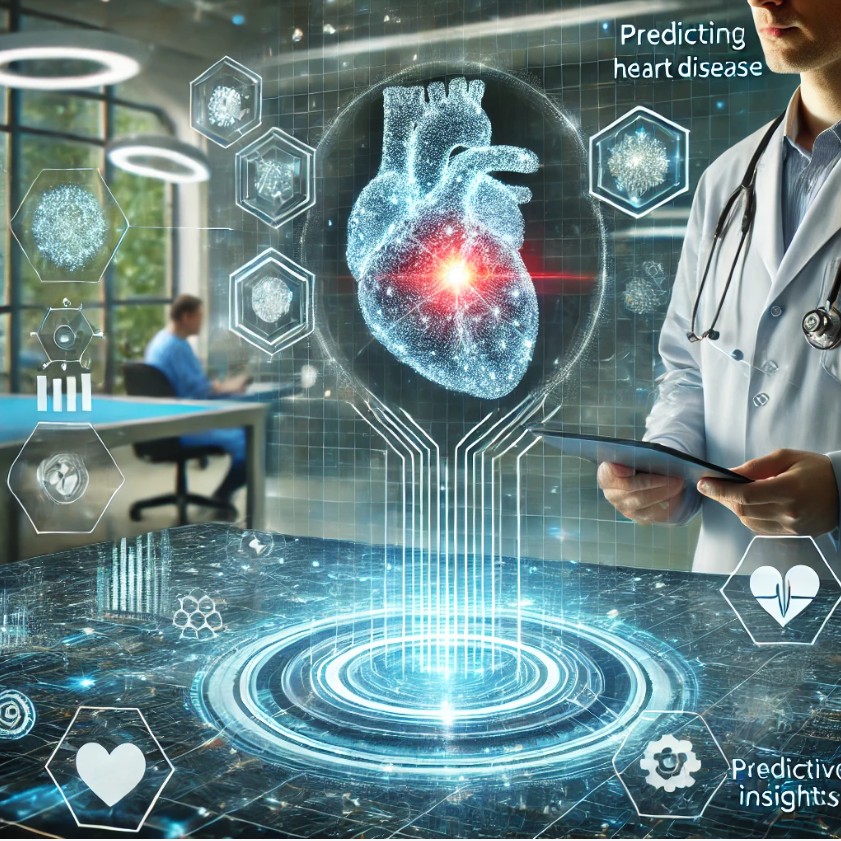

In [ ]:
from google.colab import files
from IPython.display import Image, display
uploaded = files.upload()
image_path = list(uploaded.keys())[0]
display(Image(filename=image_path))

# Abstract:
Heart disease is one of the leading causes of mortality worldwide, making early detection crucial for effective treatment and prevention. Machine learning techniques have emerged as powerful tools for predicting heart disease by analyzing key medical parameters. This study utilizes a dataset containing patient health records, including attributes such as age, cholesterol levels, blood pressure, chest pain type, and exercise-induced angina. Various machine learning models, including decision trees, logistic regression, and neural networks, are employed to classify individuals as having heart disease or not. Feature selection, data preprocessing, and hyperparameter tuning are applied to improve model accuracy. The findings demonstrate that predictive models can assist healthcare professionals in diagnosing heart disease with high accuracy, thereby supporting early intervention and reducing mortality rates.

# Dataset Information:
- Total Rows:303
- Total Columns: 14
### Missing Values:
- Ca (Coronary Artery Count): 4 missing values
- Thal (Thalassemia Type): 2 missing values
### Column Details:
- Age (int) - Patient's age
- Sex (int) - Gender (1 = Male, 0 = Female)
- ChestPain (object) - Type of chest pain (typical, asymptomatic, nonanginal, nontypical)
- RestBP (int) - Resting blood pressure (mmHg)
- Chol (int) - Serum cholesterol (mg/dl)
- Fbs (int) - Fasting blood sugar (>120 mg/dl, 1 = True, 0 = False)
- RestECG (int) - Resting ECG results (0, 1, 2)
- MaxHR (int) - Maximum heart rate achieved
- ExAng (int) - Exercise-induced angina (1 = Yes, 0 = No)
- Oldpeak (float) - ST depression induced by exercise relative to rest
- Slope (int) - Slope of the peak exercise ST segment (1, 2, 3)
- Ca (float) - Number of major vessels (0-3) colored by fluoroscopy
- Thal (object) - Thalassemia (fixed, normal, reversable)
- AHD (object) - Target variable (presence of heart disease: Yes or No)

In [ ]:
import pandas


In [ ]:
df = pandas.read_csv('heart_disease_prediction.csv')

In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

# Data Dictionary

1)age: age in years

sex: sex

1 = male
0 = female

2)cp: chest pain type
Value 0: typical angina
Value 1: atypical angina
Value 2: non-anginal pain
Value 3: asymptomatic

3)trestbps: resting blood pressure (in mm Hg on admission to the hospital)

4)chol: serum cholestoral in mg/dl

5)fbs: (fasting blood sugar > 120 mg/dl)
1 = true;
0 = false

6)restecg: resting electrocardiographic results
Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

7)thalach: maximum heart rate achieved

8): exercise induced angina
1 = yes
0 = no

9)oldpeak = ST depression induced by exercise relative to rest

10)slope: the slope of the peak exercise ST segment
Value 0: upsloping
Value 1: flat
Value 2: downsloping

12)ca: number of major vessels (0-3) colored by flourosopy

13)thal:
0 = error (in the original dataset 0 maps to NaN's)
1 = fixed defect
2 = normal
3 = reversable defect

14)target (the lable):
0 = no disease,
1 = disease


                 'cp':'chest_pain_type',
               'trestbps':'resting_blood_pressure',
               'chol': 'cholesterol',
               'fbs': 'fasting_blood_sugar',
               'restecg' : 'resting_electrocardiogram',
               'thalach': 'max_heart_rate_achieved',
               'exang': 'exercise_induced_angina',
               'oldpeak': 'st_depression',
               'slope': 'st_slope',
               'ca':'num_major_vessels',
               'thal': 'thalassemia'

# Drop unwanted Data

In [ ]:
df = df[(df['ca']<4) & (df['thal'] >0)]
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# Summary Statistics

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,296.0,54.523649,9.059471,29.0,48.0,56.0,61.00,77.0
sex,296.0,0.679054,0.467631,0.0,0.0,1.0,1.00,1.0
cp,296.0,0.959459,1.034184,0.0,0.0,1.0,2.00,3.0
trestbps,296.0,131.604730,17.726620,94.0,120.0,130.0,140.00,200.0
chol,296.0,247.155405,51.977011,126.0,211.0,242.5,275.25,564.0
fbs,296.0,0.145270,0.352970,0.0,0.0,0.0,0.00,1.0
restecg,296.0,0.523649,0.526692,0.0,0.0,1.0,1.00,2.0
thalach,296.0,149.560811,22.970792,71.0,133.0,152.5,166.00,202.0
exang,296.0,0.327703,0.470171,0.0,0.0,0.0,1.00,1.0
oldpeak,296.0,1.059122,1.166474,0.0,0.0,0.8,1.65,6.2


In [ ]:
df.nunique().to_frame(name="Unique Values")

,Unique Values
age,41
sex,2
cp,4
trestbps,49
chol,152
fbs,2
restecg,3
thalach,91
exang,2
oldpeak,40


# Visualization

In [ ]:
import seaborn
import warnings
warnings.filterwarnings('ignore')

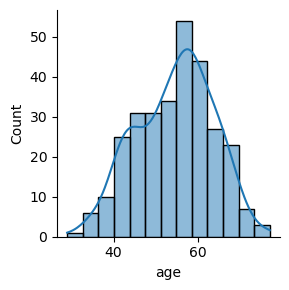

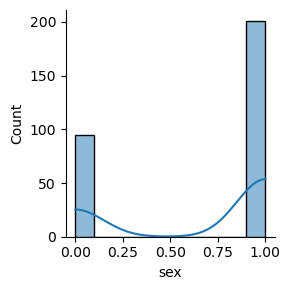

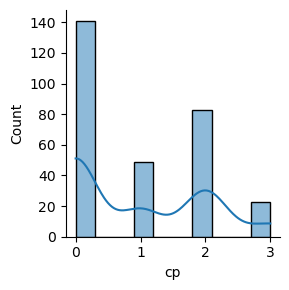

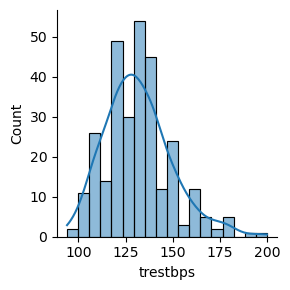

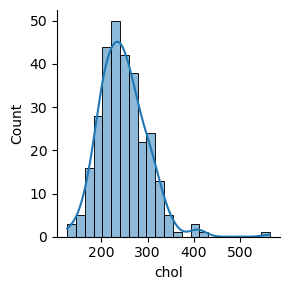

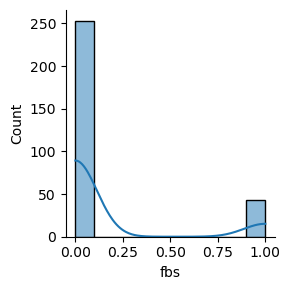

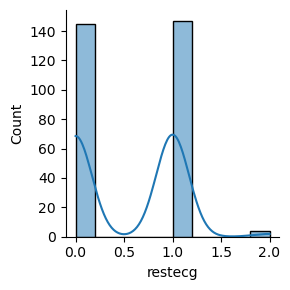

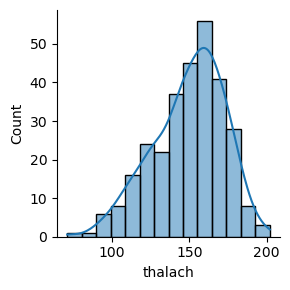

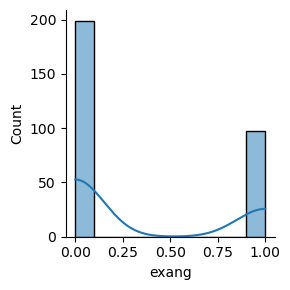

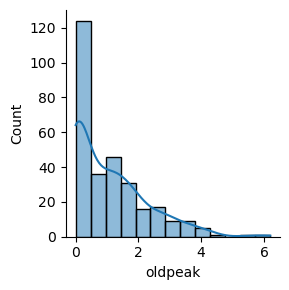

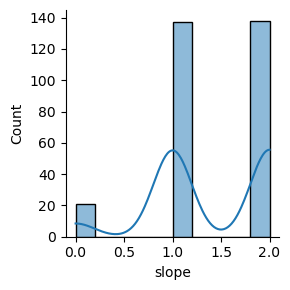

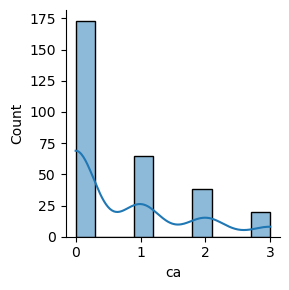

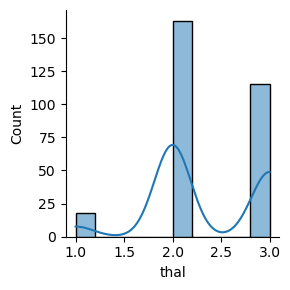

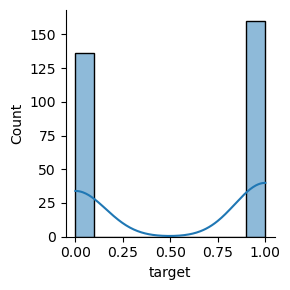

In [ ]:
columns = ['age','sex', 'cp', 'trestbps', 'chol','fbs','restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca','thal','target']
for col in columns:
    seaborn.displot(data =df, x=col, kind='hist', height=3, kde=True)

In [ ]:
df['target'].value_counts()

1    160
0    136
Name: target, dtype: int64

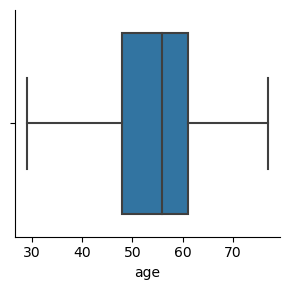

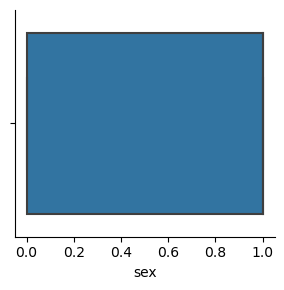

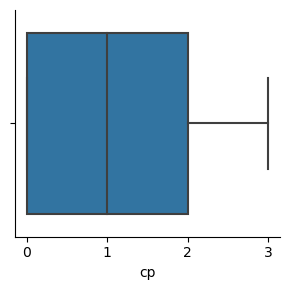

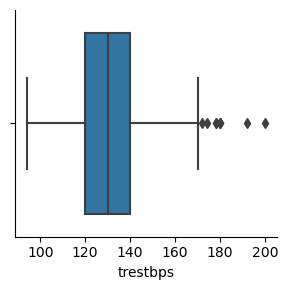

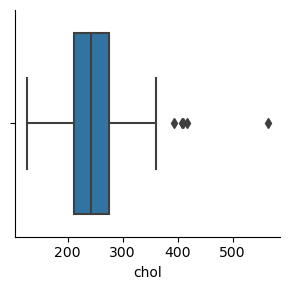

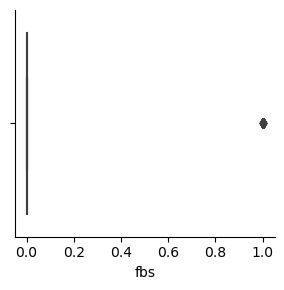

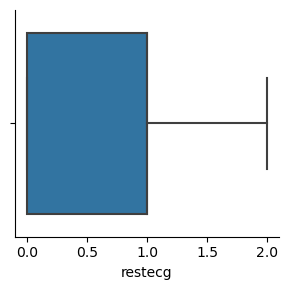

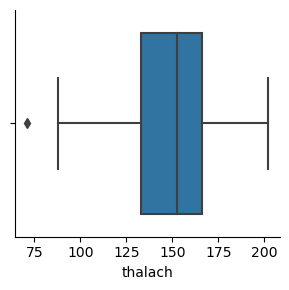

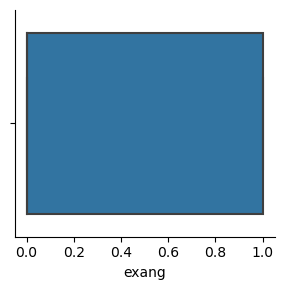

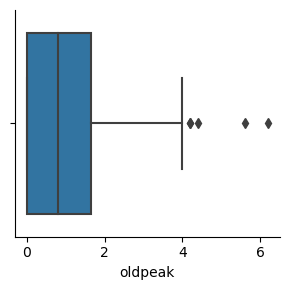

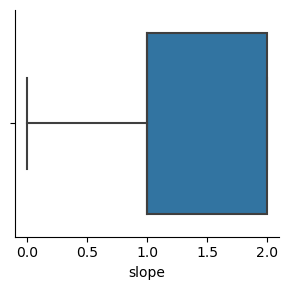

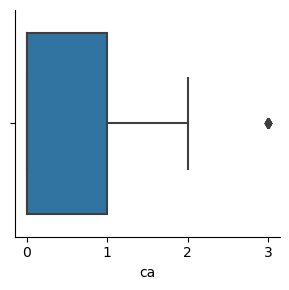

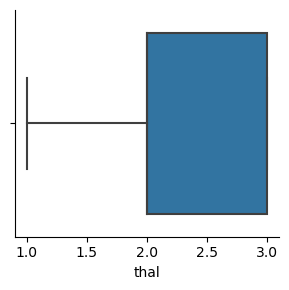

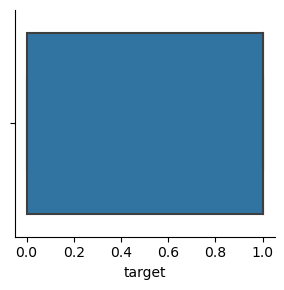

In [ ]:
columns = ['age','sex', 'cp', 'trestbps', 'chol','fbs','restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca','thal','target']
for col in columns:
    seaborn.catplot(data =df, x=col, kind='box', height=3)

# Relationship Target and other variables

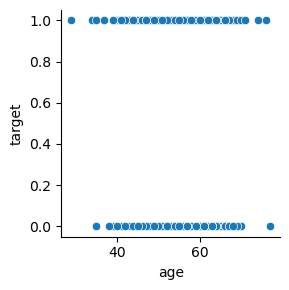

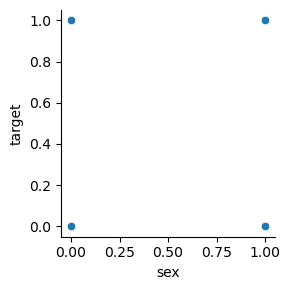

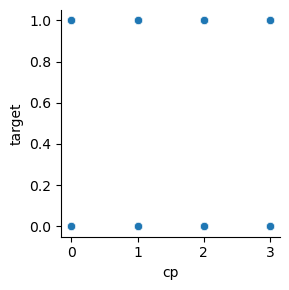

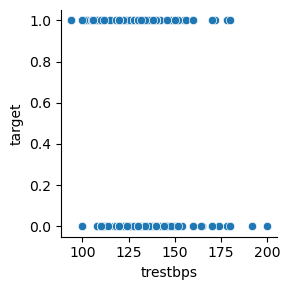

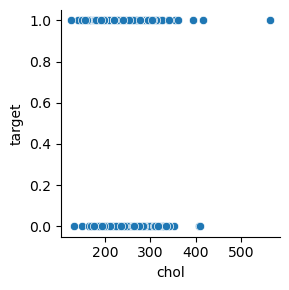

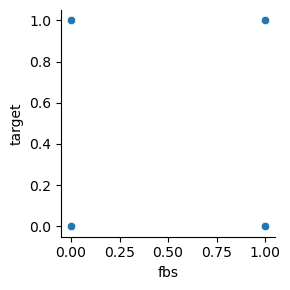

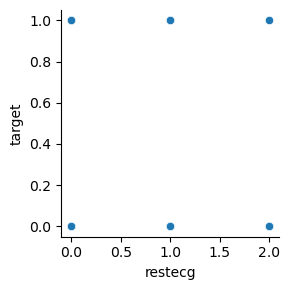

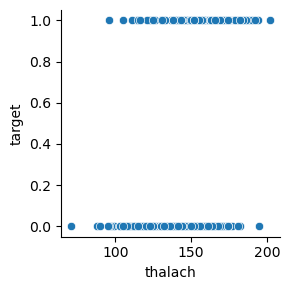

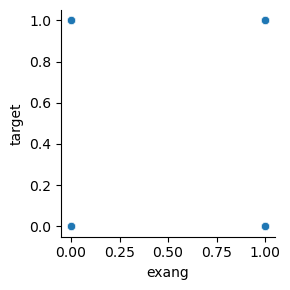

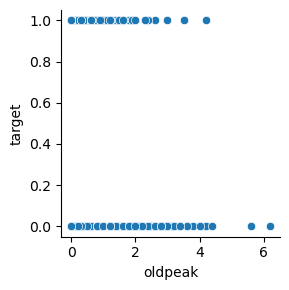

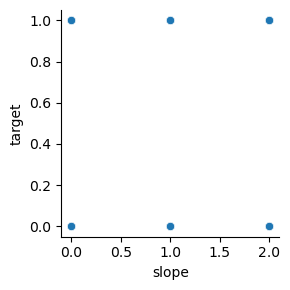

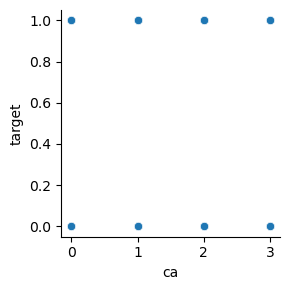

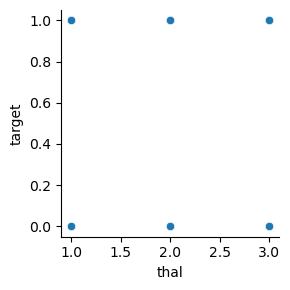

In [ ]:
columns = ['age','sex', 'cp', 'trestbps', 'chol','fbs','restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca','thal']
for col in columns:
    seaborn.relplot(data =df, x=col,y='target', kind='scatter', height=3)

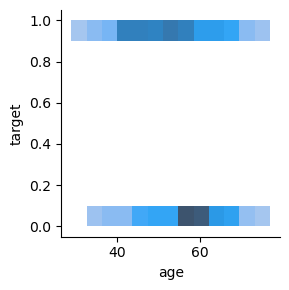

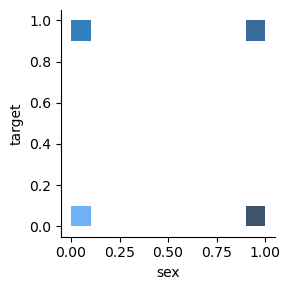

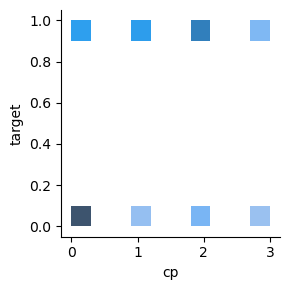

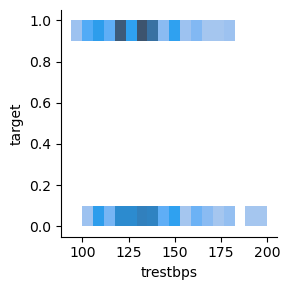

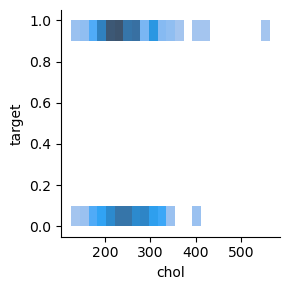

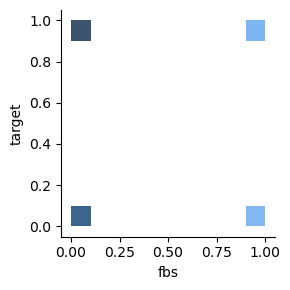

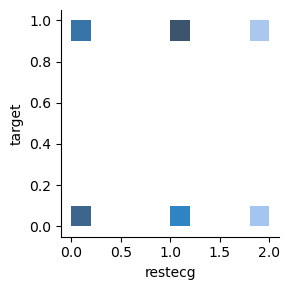

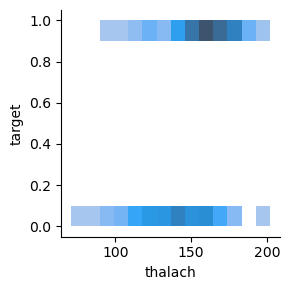

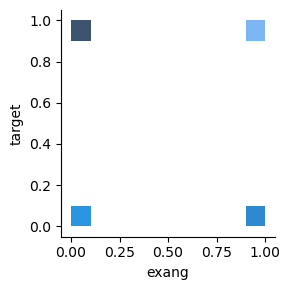

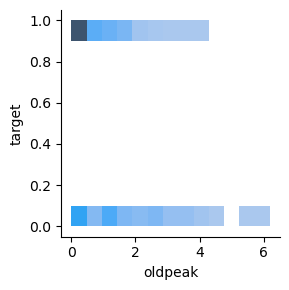

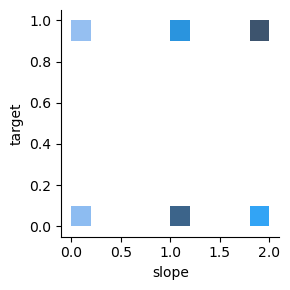

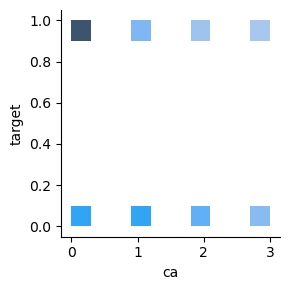

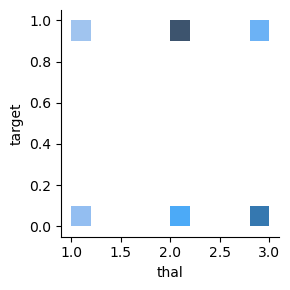

In [ ]:
columns = ['age','sex', 'cp', 'trestbps', 'chol','fbs','restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca','thal']
for col in columns:
    seaborn.displot(data =df, x=col,y='target', kind='hist', height=3)

In [ ]:
df[df['trestbps'] == df['trestbps'].max()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
223,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0


<Axes: xlabel='thal', ylabel='target'>

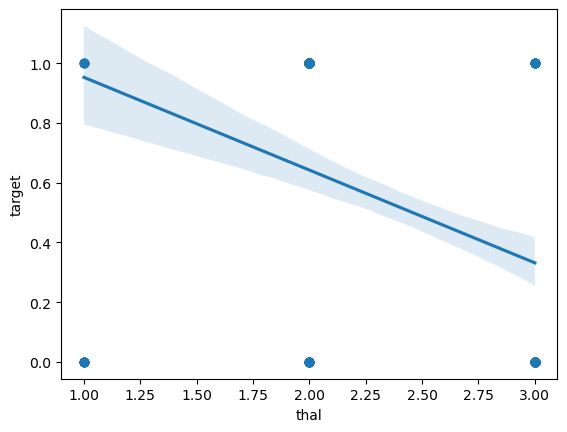

In [ ]:
seaborn.regplot(x=col, y='target', data=df)


# Checking Missing Values

In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# Correlation Matrix

In [ ]:
l = df.corr()
l

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.089820,-0.061405,0.288701,0.200920,0.133022,-0.112365,-0.395989,0.098051,0.199373,-0.161758,0.364229,0.063373,-0.225453
sex,-0.089820,1.000000,-0.048023,-0.059520,-0.193749,0.036981,-0.072303,-0.058293,0.140791,0.102641,-0.028719,0.088788,0.212017,-0.285322
cp,-0.061405,-0.048023,1.000000,0.044610,-0.067926,0.118337,0.039106,0.296621,-0.383902,-0.142159,0.104675,-0.226203,-0.162660,0.423425
trestbps,0.288701,-0.059520,0.044610,1.000000,0.126705,0.183658,-0.117539,-0.051817,0.070501,0.196793,-0.126742,0.102042,0.063773,-0.148922
chol,0.200920,-0.193749,-0.067926,0.126705,1.000000,0.014286,-0.142039,-0.001947,0.062132,0.042144,0.005572,0.119006,0.082496,-0.076541
fbs,0.133022,0.036981,0.118337,0.183658,0.014286,1.000000,-0.082361,-0.007155,-0.001863,0.007062,-0.046550,0.151259,-0.017891,-0.004680
restecg,-0.112365,-0.072303,0.039106,-0.117539,-0.142039,-0.082361,1.000000,0.030001,-0.065623,-0.055528,0.090915,-0.111317,-0.008723,0.131716
thalach,-0.395989,-0.058293,0.296621,-0.051817,-0.001947,-0.007155,0.030001,1.000000,-0.383671,-0.346742,0.388453,-0.267861,-0.111961,0.426655
exang,0.098051,0.140791,-0.383902,0.070501,0.062132,-0.001863,-0.065623,-0.383671,1.000000,0.287812,-0.248879,0.146783,0.224178,-0.425085
oldpeak,0.199373,0.102641,-0.142159,0.196793,0.042144,0.007062,-0.055528,-0.346742,0.287812,1.000000,-0.577779,0.292905,0.211675,-0.428804


In [ ]:
import matplotlib.pyplot as plt

<Axes: >

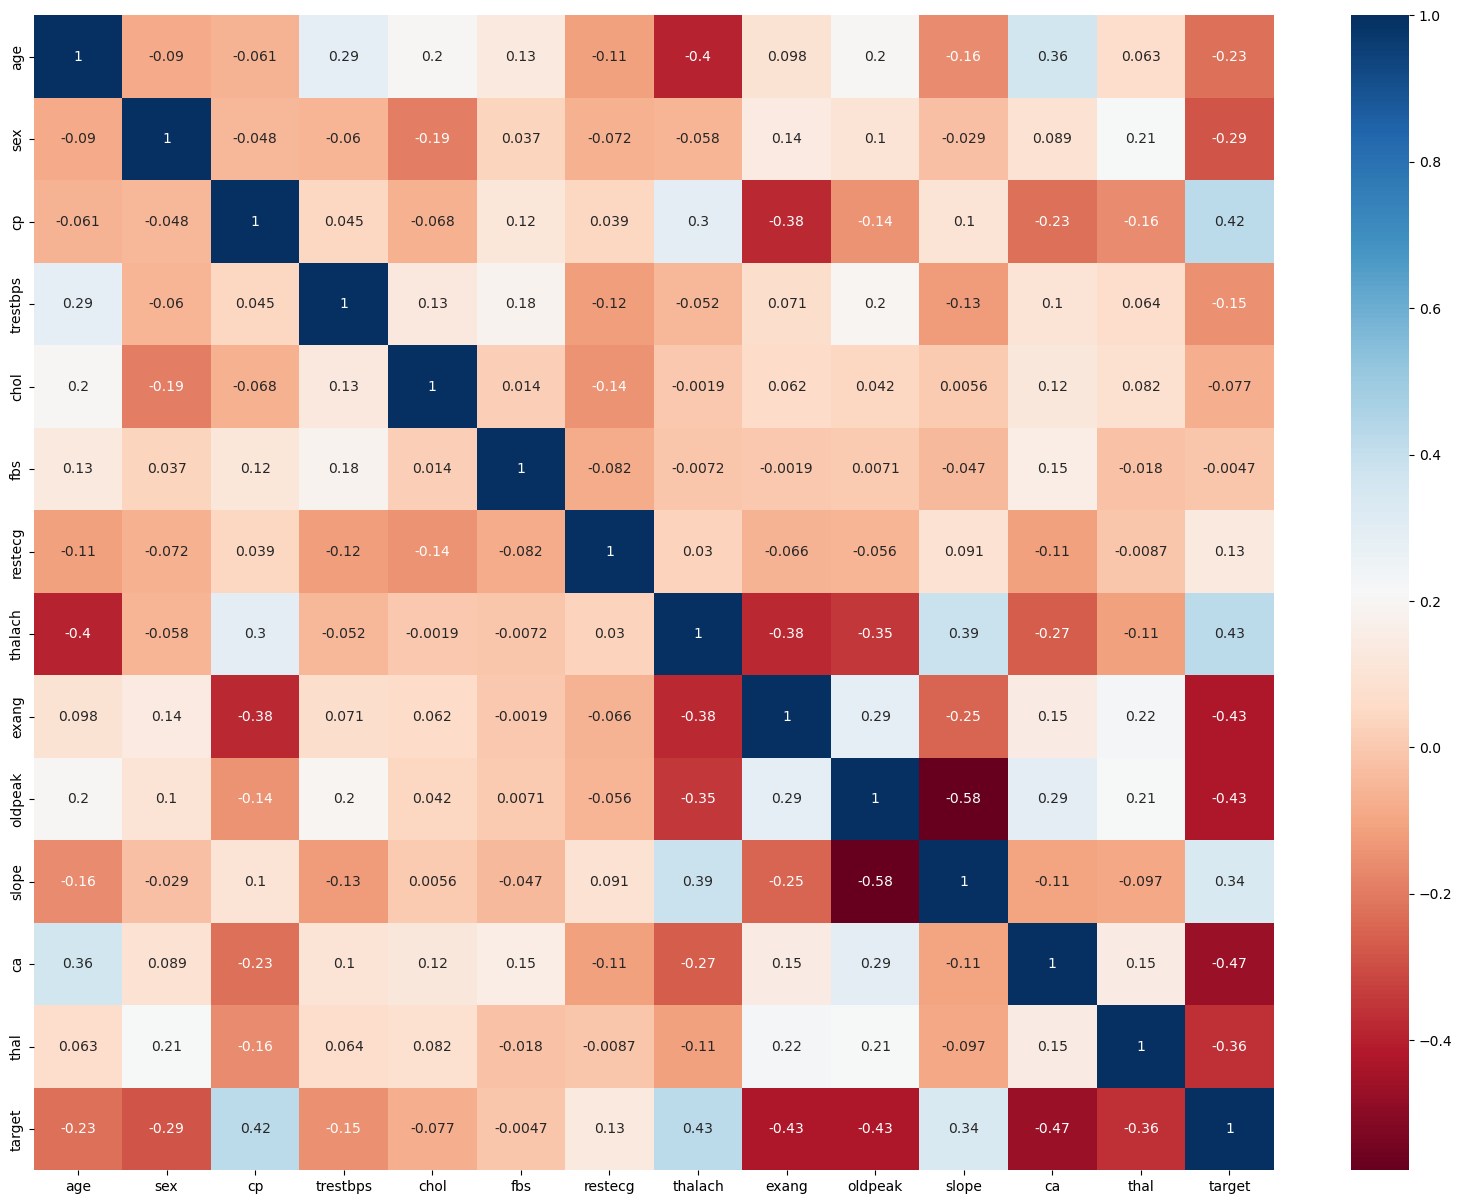

In [ ]:
plt.figure(figsize=(20,15))
seaborn.heatmap(l, annot=True, cmap='RdBu')

In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# Models

In [ ]:
X = df.drop(['target'],axis=1) #Features
y= df['target'] # Target

In [ ]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [ ]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 296, dtype: int64

# 80%Train and 20%Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train.shape,y_train.shape

((236, 13), (236,))

In [ ]:
X_test.shape,y_test.shape

((60, 13), (60,))

# The modern (boosted trees) ML algorithms such as the catboost, xgboost and lgbm. They are optimized machine learning algorithms based on the gradient-boosting technique.

# CatBoost

In [ ]:
pip install catboost

In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [ ]:
model = CatBoostClassifier(verbose=0,random_seed=42)


In [ ]:
model.fit(X_train,y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred

array([0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [ ]:
y_test

280    0
157    1
85     1
83     1
267    0
9      1
42     1
284    0
289    0
94     1
150    1
216    0
61     1
223    0
268    0
46     1
45     1
241    0
233    0
134    1
145    1
172    0
154    1
95     1
115    1
5      1
243    0
257    0
175    0
191    0
198    0
33     1
227    0
221    0
202    0
74     1
187    0
121    1
292    0
207    0
209    0
184    0
182    0
113    1
60     1
231    0
25     1
78     1
6      1
180    0
169    0
142    1
30     1
22     1
250    0
24     1
57     1
146    1
126    1
99     1
Name: target, dtype: int64

In [ ]:
accuracy = accuracy_score(y_test,y_pred)

In [ ]:

accuracy

0.8333333333333334

In [ ]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[24,  4],
       [ 6, 26]], dtype=int64)

In [ ]:
classification_report(y_test,y_pred)
print("\nClassification Report:")
print(classification_report(y_test,y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.86      0.83        28
           1       0.87      0.81      0.84        32

    accuracy                           0.83        60
   macro avg       0.83      0.83      0.83        60
weighted avg       0.84      0.83      0.83        60



In [ ]:
import matplotlib.pyplot as plt

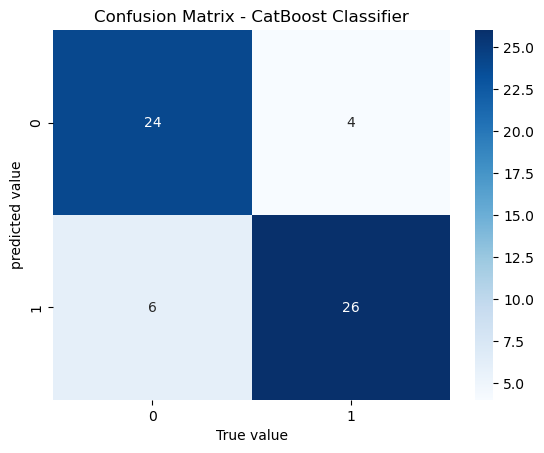

In [ ]:
seaborn.heatmap(cm,annot=True,cmap='Blues')
plt.ylabel('predicted value')
plt.xlabel('True value')
plt.title("Confusion Matrix - CatBoost Classifier")
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

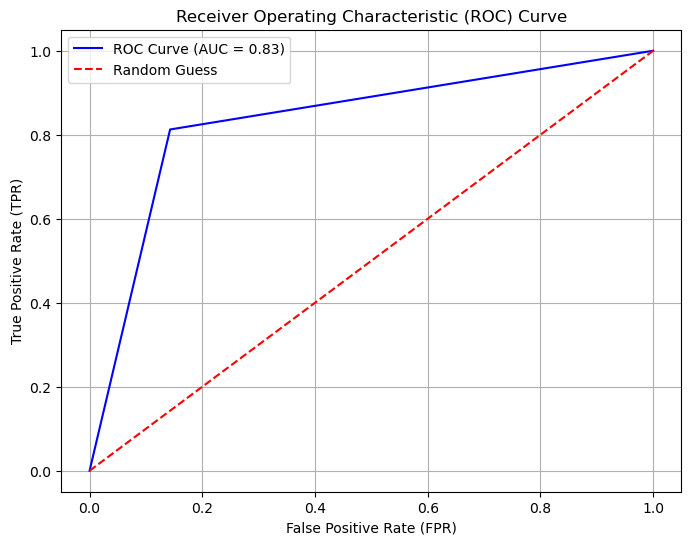

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Compute AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, y_pred)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.grid()
plt.legend()
plt.show()

# LightGBM Classifier

In [ ]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [ ]:
lgbm = lgb.LGBMClassifier(boosting_type='gbdt', objective='binary',random_state=42)

In [ ]:
lgbm

LGBMClassifier(objective='binary', random_state=42)

In [ ]:
lgbm.fit(X_train,y_train)

[LightGBM] [Info] Number of positive: 128, number of negative: 108
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002851 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 232
[LightGBM] [Info] Number of data points in the train set: 236, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.542373 -> initscore=0.169899
[LightGBM] [Info] Start training from score 0.169899
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

LGBMClassifier(objective='binary', random_state=42)

In [ ]:
y_pred = lgbm.predict(X_test)

In [ ]:
y_pred

array([0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [ ]:
y_test

280    0
157    1
85     1
83     1
267    0
9      1
42     1
284    0
289    0
94     1
150    1
216    0
61     1
223    0
268    0
46     1
45     1
241    0
233    0
134    1
145    1
172    0
154    1
95     1
115    1
5      1
243    0
257    0
175    0
191    0
198    0
33     1
227    0
221    0
202    0
74     1
187    0
121    1
292    0
207    0
209    0
184    0
182    0
113    1
60     1
231    0
25     1
78     1
6      1
180    0
169    0
142    1
30     1
22     1
250    0
24     1
57     1
146    1
126    1
99     1
Name: target, dtype: int64

In [ ]:
accuracy = accuracy_score(y_test,y_pred)

In [ ]:
accuracy

0.8166666666666667

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81        28
           1       0.86      0.78      0.82        32

    accuracy                           0.82        60
   macro avg       0.82      0.82      0.82        60
weighted avg       0.82      0.82      0.82        60



In [ ]:
 cm=confusion_matrix(y_test,y_pred)
cm

array([[24,  4],
       [ 7, 25]], dtype=int64)

In [ ]:
import seaborn

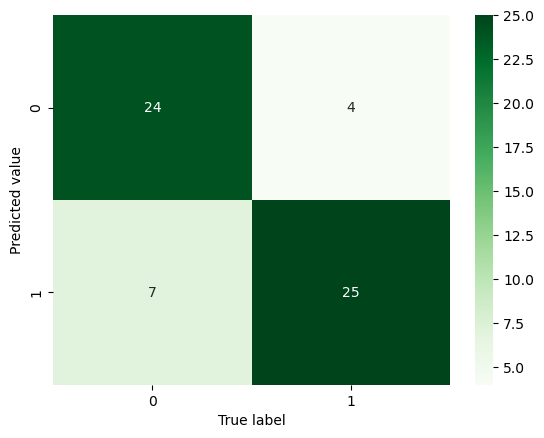

In [ ]:
seaborn.heatmap(cm,annot=True,cmap='Greens')
plt.ylabel('Predicted value')
plt.xlabel('True label')
plt.show()

In [ ]:
from sklearn.metrics import  roc_auc_score

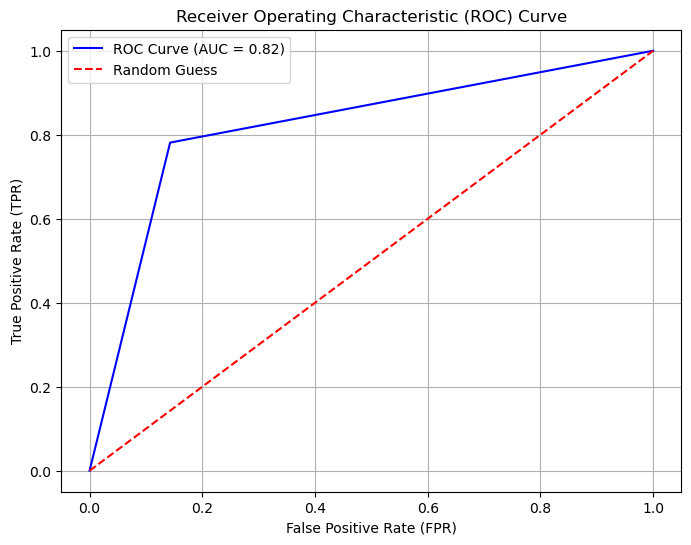

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Compute AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, y_pred)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.grid()
plt.legend()
plt.show()

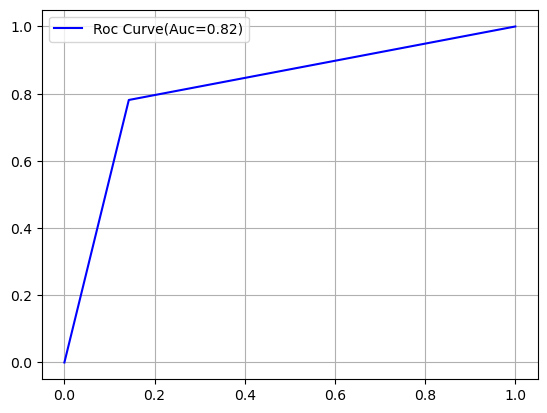

In [ ]:
plt.plot(fpr, tpr, color='blue',label=f'Roc Curve(Auc={roc_auc:.2f})')
plt.grid()
plt.legend()
plt.show()

# XGBoost Classifier

In [ ]:
import pandas
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
model = XGBClassifier(
    use_label_encoder=False,  # Avoids deprecated label encoding warnings
    eval_metric='logloss',# Evaluation metric suitable for binary classification #you can use error and auc too
    objective="binary:logistic"
)

In [ ]:
model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [ ]:
model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred

array([0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1])

In [ ]:
y_test

280    0
157    1
85     1
83     1
267    0
9      1
42     1
284    0
289    0
94     1
150    1
216    0
61     1
223    0
268    0
46     1
45     1
241    0
233    0
134    1
145    1
172    0
154    1
95     1
115    1
5      1
243    0
257    0
175    0
191    0
198    0
33     1
227    0
221    0
202    0
74     1
187    0
121    1
292    0
207    0
209    0
184    0
182    0
113    1
60     1
231    0
25     1
78     1
6      1
180    0
169    0
142    1
30     1
22     1
250    0
24     1
57     1
146    1
126    1
99     1
Name: target, dtype: int64

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.82      0.78        28
           1       0.83      0.75      0.79        32

    accuracy                           0.78        60
   macro avg       0.78      0.79      0.78        60
weighted avg       0.79      0.78      0.78        60



In [ ]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[23,  5],
       [ 8, 24]], dtype=int64)

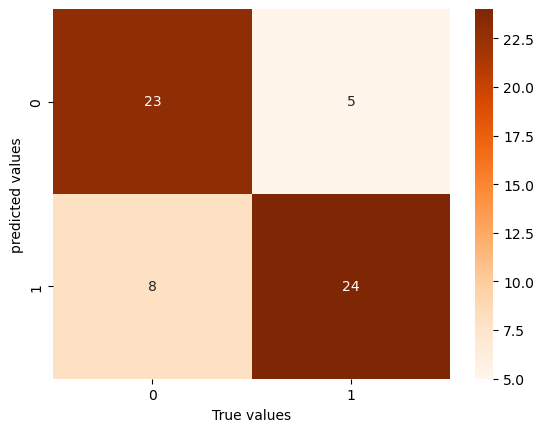

In [ ]:
seaborn.heatmap(cm,annot=True,cmap='Oranges')
plt.xlabel('True values')
plt.ylabel('predicted values')
plt.show()

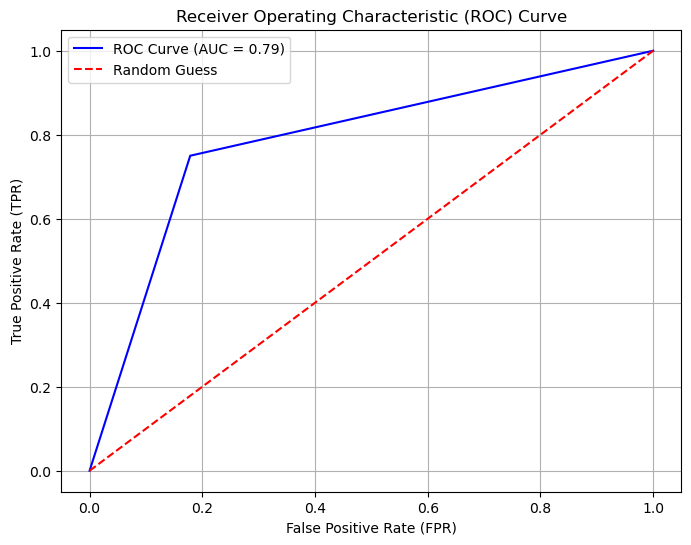

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Compute AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, y_pred)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.grid()
plt.legend()
plt.show()

# Model Comparsion

# Scikit learn Classifiers

# Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
model = RandomForestClassifier(n_estimators=100,max_depth=3,random_state=42)

In [ ]:
model

RandomForestClassifier(max_depth=3, random_state=42)

In [ ]:
model.fit(X_train,y_train)

RandomForestClassifier(max_depth=3, random_state=42)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred

array([0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [ ]:
y_test

280    0
157    1
85     1
83     1
267    0
9      1
42     1
284    0
289    0
94     1
150    1
216    0
61     1
223    0
268    0
46     1
45     1
241    0
233    0
134    1
145    1
172    0
154    1
95     1
115    1
5      1
243    0
257    0
175    0
191    0
198    0
33     1
227    0
221    0
202    0
74     1
187    0
121    1
292    0
207    0
209    0
184    0
182    0
113    1
60     1
231    0
25     1
78     1
6      1
180    0
169    0
142    1
30     1
22     1
250    0
24     1
57     1
146    1
126    1
99     1
Name: target, dtype: int64

In [ ]:
accuracy_score(y_test,y_pred)

0.8833333333333333

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.87        28
           1       0.88      0.91      0.89        32

    accuracy                           0.88        60
   macro avg       0.88      0.88      0.88        60
weighted avg       0.88      0.88      0.88        60



In [ ]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[24,  4],
       [ 3, 29]], dtype=int64)

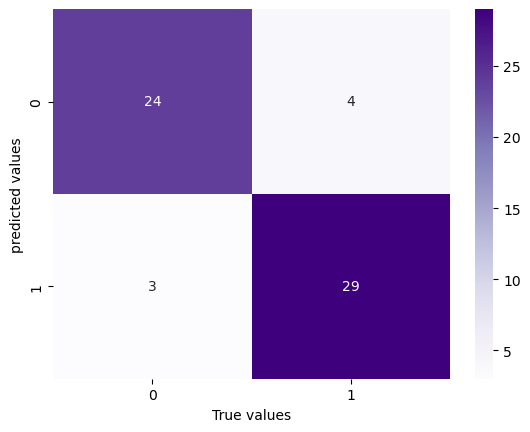

In [ ]:
seaborn.heatmap(cm,annot=True,cmap='Purples')
plt.xlabel('True values')
plt.ylabel('predicted values')
plt.show()

# Logistic Regression

In [ ]:
from sklearn.linear_model  import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
model = LogisticRegression(max_iter=300)

In [ ]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=300)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred

array([0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0], dtype=int64)

In [ ]:
y_test

280    0
157    1
85     1
83     1
267    0
9      1
42     1
284    0
289    0
94     1
150    1
216    0
61     1
223    0
268    0
46     1
45     1
241    0
233    0
134    1
145    1
172    0
154    1
95     1
115    1
5      1
243    0
257    0
175    0
191    0
198    0
33     1
227    0
221    0
202    0
74     1
187    0
121    1
292    0
207    0
209    0
184    0
182    0
113    1
60     1
231    0
25     1
78     1
6      1
180    0
169    0
142    1
30     1
22     1
250    0
24     1
57     1
146    1
126    1
99     1
Name: target, dtype: int64

In [ ]:
accuracy_score(y_test,y_pred)

0.8666666666666667

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86        28
           1       0.90      0.84      0.87        32

    accuracy                           0.87        60
   macro avg       0.87      0.87      0.87        60
weighted avg       0.87      0.87      0.87        60



In [ ]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[25,  3],
       [ 5, 27]], dtype=int64)

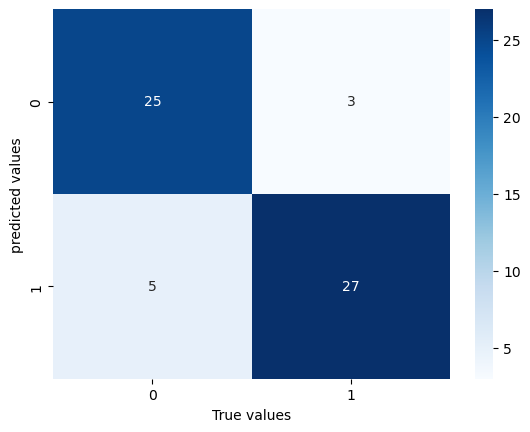

In [ ]:
seaborn.heatmap(cm,annot=True,cmap='Blues')
plt.xlabel('True values')
plt.ylabel('predicted values')
plt.show()

# Quadratic Discriminant Analysis (QDA)

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
model = QuadraticDiscriminantAnalysis()

In [ ]:
model.fit(X_train,y_train)

QuadraticDiscriminantAnalysis()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred

array([0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0], dtype=int64)

In [ ]:
y_test

280    0
157    1
85     1
83     1
267    0
9      1
42     1
284    0
289    0
94     1
150    1
216    0
61     1
223    0
268    0
46     1
45     1
241    0
233    0
134    1
145    1
172    0
154    1
95     1
115    1
5      1
243    0
257    0
175    0
191    0
198    0
33     1
227    0
221    0
202    0
74     1
187    0
121    1
292    0
207    0
209    0
184    0
182    0
113    1
60     1
231    0
25     1
78     1
6      1
180    0
169    0
142    1
30     1
22     1
250    0
24     1
57     1
146    1
126    1
99     1
Name: target, dtype: int64

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86        28
           1       0.90      0.84      0.87        32

    accuracy                           0.87        60
   macro avg       0.87      0.87      0.87        60
weighted avg       0.87      0.87      0.87        60



In [ ]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[25,  3],
       [ 5, 27]], dtype=int64)

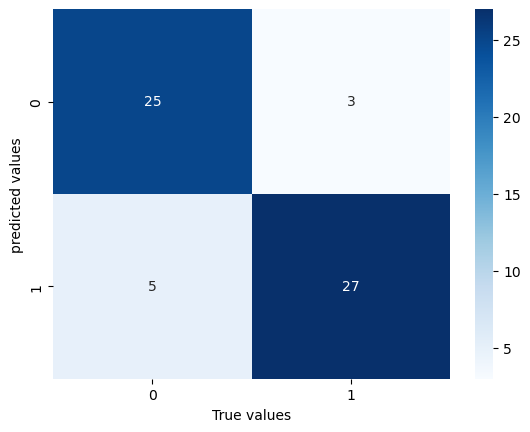

In [ ]:
seaborn.heatmap(cm,annot=True,cmap='Blues')
plt.xlabel('True values')
plt.ylabel('predicted values')
plt.show()

# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
model = GaussianNB()

In [ ]:
model.fit(X_train,y_train)

GaussianNB()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred

array([0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0], dtype=int64)

In [ ]:
y_test

280    0
157    1
85     1
83     1
267    0
9      1
42     1
284    0
289    0
94     1
150    1
216    0
61     1
223    0
268    0
46     1
45     1
241    0
233    0
134    1
145    1
172    0
154    1
95     1
115    1
5      1
243    0
257    0
175    0
191    0
198    0
33     1
227    0
221    0
202    0
74     1
187    0
121    1
292    0
207    0
209    0
184    0
182    0
113    1
60     1
231    0
25     1
78     1
6      1
180    0
169    0
142    1
30     1
22     1
250    0
24     1
57     1
146    1
126    1
99     1
Name: target, dtype: int64

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        28
           1       0.93      0.88      0.90        32

    accuracy                           0.90        60
   macro avg       0.90      0.90      0.90        60
weighted avg       0.90      0.90      0.90        60



In [ ]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[26,  2],
       [ 4, 28]], dtype=int64)

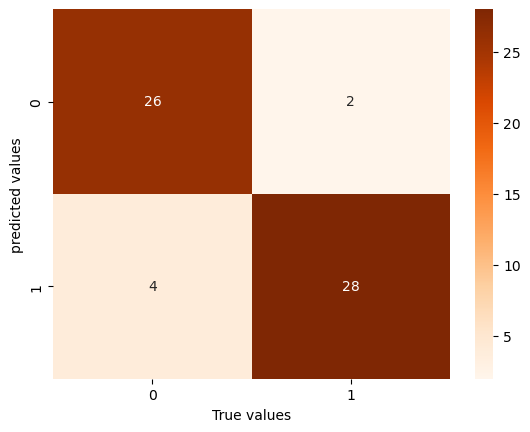

In [ ]:
seaborn.heatmap(cm,annot=True,cmap='Oranges')
plt.xlabel('True values')
plt.ylabel('predicted values')
plt.show()

# Support Vector Classifier (SVC)

In [ ]:
from sklearn.svm import SVC

In [ ]:
model = SVC(kernel='linear', C=1.0) #kernel: Specifies the kernel type to be used in the algorithm (e.g., 'linear', 'rbf', 'poly', 'sigmoid').

In [ ]:
model.fit(X_train,y_train)

SVC(kernel='linear')

In [ ]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
280,42,1,0,136,315,0,1,125,1,1.8,1,0,1
157,35,1,1,122,192,0,1,174,0,0.0,2,0,2
85,67,0,2,115,564,0,0,160,0,1.6,1,0,3
83,52,1,3,152,298,1,1,178,0,1.2,1,0,3
267,49,1,2,118,149,0,0,126,0,0.8,2,3,2
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2
42,45,1,0,104,208,0,0,148,1,3.0,1,0,2
284,61,1,0,140,207,0,0,138,1,1.9,2,1,3
289,55,0,0,128,205,0,2,130,1,2.0,1,1,3
94,45,0,1,112,160,0,1,138,0,0.0,1,0,2


In [ ]:
y_test

280    0
157    1
85     1
83     1
267    0
9      1
42     1
284    0
289    0
94     1
150    1
216    0
61     1
223    0
268    0
46     1
45     1
241    0
233    0
134    1
145    1
172    0
154    1
95     1
115    1
5      1
243    0
257    0
175    0
191    0
198    0
33     1
227    0
221    0
202    0
74     1
187    0
121    1
292    0
207    0
209    0
184    0
182    0
113    1
60     1
231    0
25     1
78     1
6      1
180    0
169    0
142    1
30     1
22     1
250    0
24     1
57     1
146    1
126    1
99     1
Name: target, dtype: int64

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred

array([0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0], dtype=int64)

In [ ]:
y_test

280    0
157    1
85     1
83     1
267    0
9      1
42     1
284    0
289    0
94     1
150    1
216    0
61     1
223    0
268    0
46     1
45     1
241    0
233    0
134    1
145    1
172    0
154    1
95     1
115    1
5      1
243    0
257    0
175    0
191    0
198    0
33     1
227    0
221    0
202    0
74     1
187    0
121    1
292    0
207    0
209    0
184    0
182    0
113    1
60     1
231    0
25     1
78     1
6      1
180    0
169    0
142    1
30     1
22     1
250    0
24     1
57     1
146    1
126    1
99     1
Name: target, dtype: int64

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88        28
           1       0.90      0.88      0.89        32

    accuracy                           0.88        60
   macro avg       0.88      0.88      0.88        60
weighted avg       0.88      0.88      0.88        60



In [ ]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[25,  3],
       [ 4, 28]], dtype=int64)

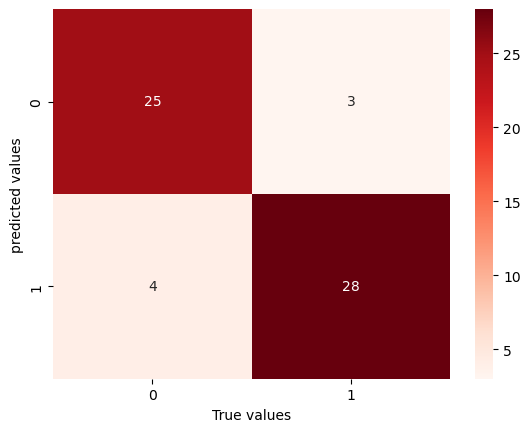

In [ ]:
seaborn.heatmap(cm,annot=True,cmap='Reds')
plt.xlabel('True values')
plt.ylabel('predicted values')
plt.show()

# Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)


In [ ]:
model.fit(X_train,y_train)

GradientBoostingClassifier()

In [ ]:
model.score(X_test,y_test)

0.85

#  Multilayer Perceptron Classifier

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
model = MLPClassifier(hidden_layer_sizes=(100), activation='relu', max_iter=300, random_state=42)


In [ ]:
model.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=100, max_iter=300, random_state=42)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred

array([0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [ ]:
y_test

280    0
157    1
85     1
83     1
267    0
9      1
42     1
284    0
289    0
94     1
150    1
216    0
61     1
223    0
268    0
46     1
45     1
241    0
233    0
134    1
145    1
172    0
154    1
95     1
115    1
5      1
243    0
257    0
175    0
191    0
198    0
33     1
227    0
221    0
202    0
74     1
187    0
121    1
292    0
207    0
209    0
184    0
182    0
113    1
60     1
231    0
25     1
78     1
6      1
180    0
169    0
142    1
30     1
22     1
250    0
24     1
57     1
146    1
126    1
99     1
Name: target, dtype: int64

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        28
           1       0.93      0.88      0.90        32

    accuracy                           0.90        60
   macro avg       0.90      0.90      0.90        60
weighted avg       0.90      0.90      0.90        60



In [ ]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[26,  2],
       [ 4, 28]], dtype=int64)

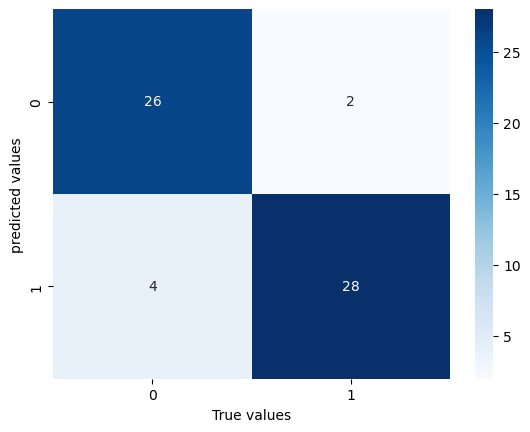

In [ ]:
seaborn.heatmap(cm,annot=True,cmap='Blues')
plt.xlabel('True values')
plt.ylabel('predicted values')
plt.show()

# KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)


In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn.score(X_test,y_test)

0.7